In [5]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
vehicle_data=pd.read_csv('Car details v3.csv')

In [8]:
vehicle_data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
vehicle_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [11]:
vehicle_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
print(vehicle_data["transmission"].unique())
print(vehicle_data["owner"].unique())

['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [13]:
print(vehicle_data['engine'].unique())
print(vehicle_data['max_power'].unique())
print(vehicle_data['seats'].unique())
print(vehicle_data['year'].unique())

['1248 CC' '1498 CC' '1497 CC' '1396 CC' '1298 CC' '1197 CC' '1061 CC'
 '796 CC' '1364 CC' '1399 CC' '1461 CC' '993 CC' nan '1198 CC' '1199 CC'
 '998 CC' '1591 CC' '2179 CC' '1368 CC' '2982 CC' '2494 CC' '2143 CC'
 '2477 CC' '1462 CC' '2755 CC' '1968 CC' '1798 CC' '1196 CC' '1373 CC'
 '1598 CC' '1998 CC' '1086 CC' '1194 CC' '1172 CC' '1405 CC' '1582 CC'
 '999 CC' '2487 CC' '1999 CC' '3604 CC' '2987 CC' '1995 CC' '1451 CC'
 '1969 CC' '2967 CC' '2497 CC' '1797 CC' '1991 CC' '2362 CC' '1493 CC'
 '1599 CC' '1341 CC' '1794 CC' '799 CC' '1193 CC' '2696 CC' '1495 CC'
 '1186 CC' '1047 CC' '2498 CC' '2956 CC' '2523 CC' '1120 CC' '624 CC'
 '1496 CC' '1984 CC' '2354 CC' '814 CC' '793 CC' '1799 CC' '936 CC'
 '1956 CC' '1997 CC' '1499 CC' '1948 CC' '2997 CC' '2489 CC' '2499 CC'
 '2609 CC' '2953 CC' '1150 CC' '1994 CC' '1388 CC' '1527 CC' '2199 CC'
 '995 CC' '2993 CC' '1586 CC' '1390 CC' '909 CC' '2393 CC' '3198 CC'
 '1339 CC' '2835 CC' '2092 CC' '1595 CC' '2496 CC' '1596 CC' '1597 CC'
 '2596 CC' '2

In [14]:
vehicle_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [15]:
vehicle_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# #visualization of each features

<AxesSubplot:>

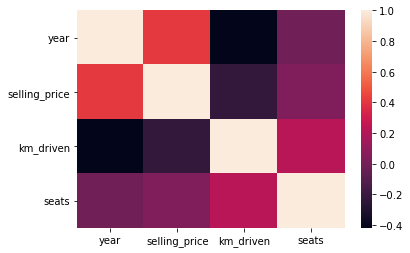

In [16]:
sns.heatmap(vehicle_data.corr())

In [17]:
vehicle_data.dropna(inplace=True, axis=0, how='any')
vehicle_data.duplicated().sum()
vehicle_data.drop_duplicates(inplace=True)

In [18]:
vehicle_data['mileage']=vehicle_data['mileage'].replace('kmpl','',regex=True).str.replace(',', '')
vehicle_data['mileage']=vehicle_data['mileage'].replace('km/kg','',regex=True).str.replace(',', '')
vehicle_data['engine']=vehicle_data['engine'].replace('CC','',regex=True).str.replace(',', '')
vehicle_data['max_power']=vehicle_data['max_power'].replace('bhp','',regex=True).str.replace(',', '')


In [19]:
vehicle_data['mileage'] = pd.to_numeric(vehicle_data['mileage'])
vehicle_data['engine'] = pd.to_numeric(vehicle_data['engine'])
vehicle_data['max_power'] = pd.to_numeric(vehicle_data['max_power'])
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 734.7+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SealsPrice')

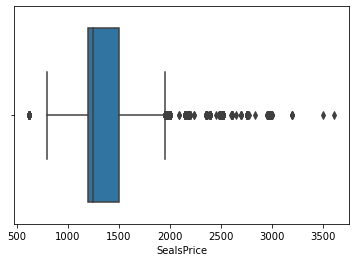

In [20]:
sns.boxplot(vehicle_data['engine'])
plt.xlabel('SealsPrice')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SealsPrice')

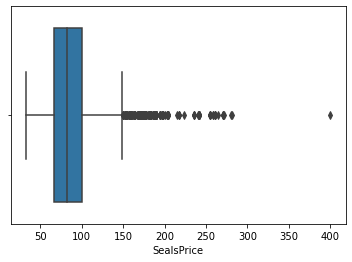

In [21]:
sns.boxplot(vehicle_data['max_power'])
plt.xlabel('SealsPrice')

In [22]:
correlation = vehicle_data.corr()
correlation

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427335,-0.387918,0.366048,-0.019763,0.159889,0.025021
selling_price,0.427335,1.000000,-0.161265,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.387918,-0.161265,1.000000,-0.196419,0.253460,0.041770,0.207890
mileage,0.366048,-0.108655,-0.196419,1.000000,-0.579153,-0.378609,-0.459188
engine,-0.019763,0.442772,0.253460,-0.579153,1.000000,0.683506,0.658711
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028
seats,0.025021,0.158531,0.207890,-0.459188,0.658711,0.259028,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SealsPrice')

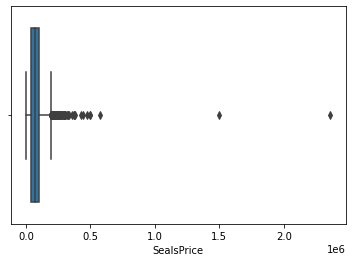

In [23]:
sns.boxplot(vehicle_data['km_driven'])
plt.xlabel('SealsPrice')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SealsPrice')

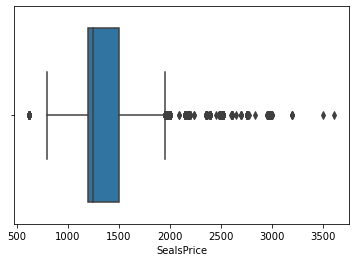

In [24]:
sns.boxplot(vehicle_data['engine'])
plt.xlabel('SealsPrice')

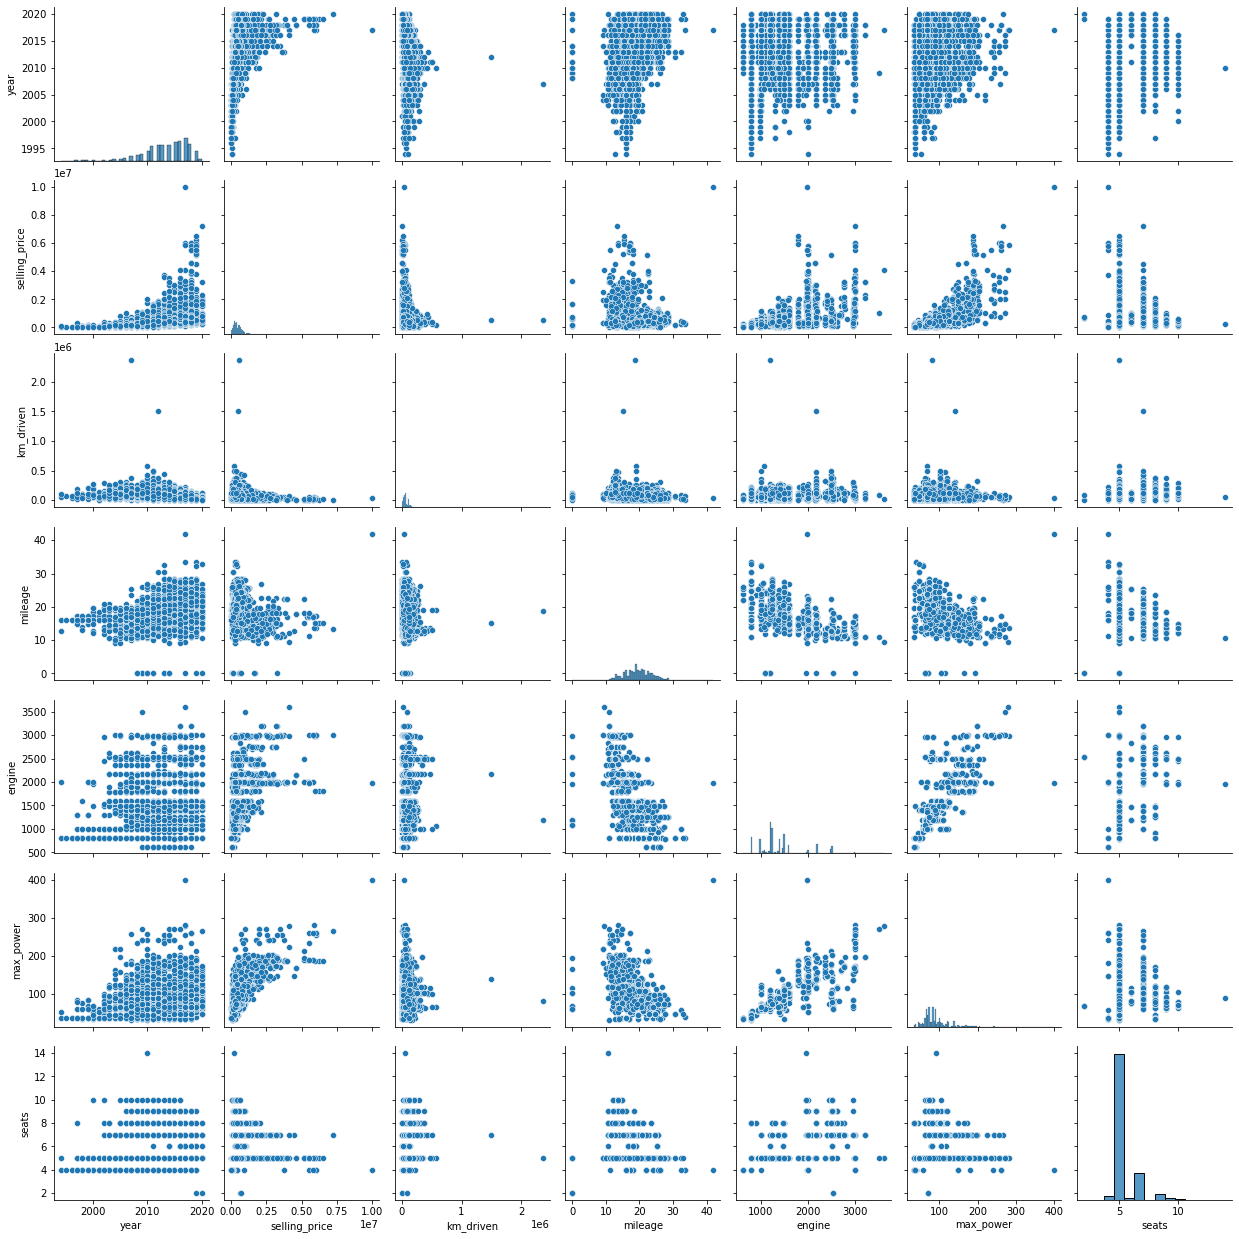

In [25]:
sns.pairplot(vehicle_data)

In [26]:
x=vehicle_data.iloc[:,1:]
y=vehicle_data.iloc[:,0]


In [27]:
x.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [28]:
y.head()

0          Maruti Swift Dzire VDI
1    Skoda Rapid 1.5 TDI Ambition
2        Honda City 2017-2020 EXi
3       Hyundai i20 Sportz Diesel
4          Maruti Swift VXI BSIII
Name: name, dtype: object

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   mileage        6717 non-null   float64
 8   engine         6717 non-null   int64  
 9   max_power      6717 non-null   float64
 10  torque         6717 non-null   object 
 11  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 682.2+ KB


In [31]:
carda_data=pd.read_csv('Car data.csv')

In [32]:
carda_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
carda_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [73]:
carda_data.shape

(301, 9)

In [34]:
carda_data.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [48]:
p = vehicle_data.iloc[:, [1,3,4,5,6,7,8,9,10,12]].values
q = vehicle_data.loc[:, 'selling_price']



In [49]:
p= np.array(p)
q= np.array(q)

In [56]:
np.unique(p[:,2])

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)

In [60]:
p=pd.get_dummies(p, columns=[2,3,4,5], drop_first=True)
p


,0,1,6,7,8,9,2_Diesel,2_LPG,2_Petrol,3_Individual,3_Trustmark Dealer,4_Manual,5_Fourth & Above Owner,5_Second Owner,5_Test Drive Car,5_Third Owner
0,2014,145500,23.4,1248,74.0,5.0,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,5.0,1,0,0,1,0,1,0,1,0,0
2,2006,140000,17.7,1497,78.0,5.0,0,0,1,1,0,1,0,0,0,1
3,2010,127000,23.0,1396,90.0,5.0,1,0,0,1,0,1,0,0,0,0
4,2007,120000,16.1,1298,88.2,5.0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,2013,50000,18.9,998,67.1,5.0,0,0,1,1,0,1,0,1,0,0
6713,2014,80000,22.54,1396,88.73,5.0,1,0,0,1,0,1,0,1,0,0
6714,2013,110000,18.5,1197,82.85,5.0,0,0,1,1,0,1,0,0,0,0
6715,2007,119000,16.8,1493,110.0,5.0,1,0,0,1,0,1,1,0,0,0


In [61]:
p = np.array(p)
p

array([[2014, 145500, 23.4, ..., 0, 0, 0],
       [2014, 120000, 21.14, ..., 1, 0, 0],
       [2006, 140000, 17.7, ..., 0, 0, 1],
       ...,
       [2013, 110000, 18.5, ..., 0, 0, 0],
       [2007, 119000, 16.8, ..., 0, 0, 0],
       [2009, 120000, 19.3, ..., 0, 0, 0]], dtype=object)

In [63]:
p = pd.DataFrame(p)
p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2014,145500,23.4,1248,74.0,5.0,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,5.0,1,0,0,1,0,1,0,1,0,0
2,2006,140000,17.7,1497,78.0,5.0,0,0,1,1,0,1,0,0,0,1
3,2010,127000,23.0,1396,90.0,5.0,1,0,0,1,0,1,0,0,0,0
4,2007,120000,16.1,1298,88.2,5.0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,2013,50000,18.9,998,67.1,5.0,0,0,1,1,0,1,0,1,0,0
6713,2014,80000,22.54,1396,88.73,5.0,1,0,0,1,0,1,0,1,0,0
6714,2013,110000,18.5,1197,82.85,5.0,0,0,1,1,0,1,0,0,0,0
6715,2007,119000,16.8,1493,110.0,5.0,1,0,0,1,0,1,1,0,0,0


In [58]:
##from sklearn.model_selection import train_test_split
##ptr,pte,qtr,qte=train_test_split(p,q,test_size=0.2)


In [64]:
from sklearn.model_selection import train_test_split
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2)

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300).fit(p_train, q_train)
print(regressor.score(p_train, q_train))

0.9847505004922434


In [72]:
q_pred = regressor.predict(p_test)
q_pred = np.array(q_pred, dtype='int')
q_test = pd.Series(q_test)
q_pred = pd.Series(q_pred)

In [68]:
q_test

0       114999
1       850000
2       350000
3       957000
4       600000
         ...  
1339    290000
1340    200000
1341    350000
1342    180000
1343    390000
Length: 1344, dtype: int64

In [69]:
q_pred

0       131249
1       738809
2       340663
3       947181
4       708633
         ...  
1339    347981
1340    207696
1341    350453
1342    243259
1343    411357
Length: 1344, dtype: int32

In [70]:
p_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6659,2010,60000,18.0,995,62.0,5.0,0,0,1,1,0,1,0,1,0,0
3770,2017,27000,20.73,1373,91.1,5.0,0,0,1,1,0,1,0,0,0,0
257,2013,90000,17.97,1498,99.6,5.0,0,0,1,1,0,0,0,1,0,0
4548,2017,60000,21.38,1396,88.7,5.0,1,0,0,1,0,1,0,0,0,0
2389,2017,35000,17.5,1373,91.1,7.0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2015,60000,20.51,998,67.04,5.0,0,0,1,1,0,1,0,0,0,0
1680,2011,84321,23.57,1396,70.0,5.0,1,0,0,1,0,1,0,0,0,0
926,2012,79990,17.8,1399,67.0,5.0,1,0,0,0,0,1,0,1,0,0
4705,2007,150000,18.1,1493,110.0,5.0,1,0,0,1,0,1,0,1,0,0
